In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
net = pd.read_csv('netflix_titles.csv')

In [3]:
net.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
net.shape

(8807, 12)

In [5]:
net.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
# Counting the countries
net.country.value_counts()

United States                                                                  2818
India                                                                           972
United Kingdom                                                                  419
Japan                                                                           245
South Korea                                                                     199
                                                                               ... 
Denmark, France, Belgium, Italy, Netherlands, United States, United Kingdom       1
Kuwait, United States                                                             1
Netherlands, Germany, Italy, Canada                                               1
France, Belgium, Luxembourg, Cambodia,                                            1
Australia, United Kingdom, United States, New Zealand, Italy, France              1
Name: country, Length: 748, dtype: int64

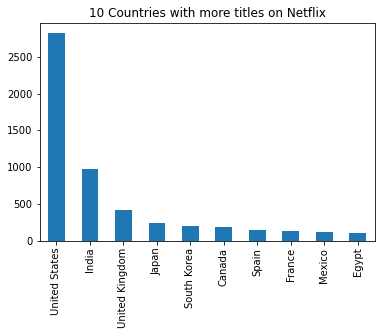

In [7]:
# Plotting the countries with the most titles
net.country.value_counts().iloc[:10].plot.bar()
plt.title('10 Countries with more titles on Netflix')
plt.show()

In [8]:
# Counting the types
net.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

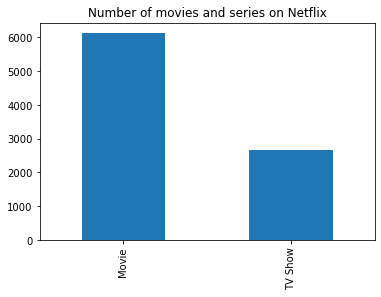

In [9]:
# Plotting the types
net.type.value_counts().plot.bar()
plt.title('Number of movies and series on Netflix')
plt.show()

In [10]:
# Grouping by country and type
net.groupby(['country', 'type']).count().sort_values(by='show_id', ascending=False)

show_id  title  \
country                                            type                      
United States                                      Movie       2058   2058   
India                                              Movie        893    893   
United States                                      TV Show      760    760   
United Kingdom                                     TV Show      213    213   
                                                   Movie        206    206   
...                                                             ...    ...   
Ireland, Canada                                    Movie          1      1   
Ireland, Canada, Luxembourg, United States, Uni... Movie          1      1   
Ireland, Canada, United Kingdom, United States     Movie          1      1   
Ireland, Canada, United States, United Kingdom     TV Show        1      1   
Zimbabwe                                           Movie          1      1   

                                                            director  cast  \
country                                            type                      
United States                                      Movie        2000  1864   
India                                              Movie         881   878   
United States                                      TV Show        48   624   
United Kingdom                                     TV Show        21   178   
                                                   Movie         191   173   
...                                                              ...   ...   
Ireland, Canada                                    Movie           1     1   
Ireland, Canada, Luxembourg, United States, Uni... Movie           1     1   
Ireland, Canada, United Kingdom, United States     Movie           1     1   
Ireland, Canada, United States, United Kingdom     TV Show         0     1   
Zimbabwe                                           Movie           1     1   

                                                            date_added  \
country                                            type                  
United States                                      Movie          2058   
India                                              Movie           893   
United States                                      TV Show         754   
United Kingdom                                     TV Show         212   
                                                   Movie           206   
...                                                                ...   
Ireland, Canada                                    Movie             1   
Ireland, Canada, Luxembourg, United States, Uni... Movie             1   
Ireland, Canada, United Kingdom, United States     Movie             1   
Ireland, Canada, United States, United Kingdom     TV Show           1   
Zimbabwe                                           Movie             1   

                                                            release_year  \
country                                            type                    
United States                                      Movie            2058   
India                                              Movie             893   
United States                                      TV Show           760   
United Kingdom                                     TV Show           213   
                                                   Movie             206   
...                                                                  ...   
Ireland, Canada                                    Movie               1   
Ireland, Canada, Luxembourg, United States, Uni... Movie               1   
Ireland, Canada, United Kingdom, United States     Movie               1   
Ireland, Canada, United States, United Kingdom     TV Show             1   
Zimbabwe                                           Movie               1   

                                                            rating  duration  

In [11]:
# Grouping and counting by country and typ
net.groupby(['country', 'type']).description.agg({len}).sort_values(by='len', ascending=False)

len
country                                            type         
United States                                      Movie    2058
India                                              Movie     893
United States                                      TV Show   760
United Kingdom                                     TV Show   213
                                                   Movie     206
...                                                          ...
Ireland, Canada                                    Movie       1
Ireland, Canada, Luxembourg, United States, Uni... Movie       1
Ireland, Canada, United Kingdom, United States     Movie       1
Ireland, Canada, United States, United Kingdom     TV Show     1
Zimbabwe                                           Movie       1

[847 rows x 1 columns]

In [12]:
# Missing data in the director column
net[pd.isnull(net.director)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
14,s15,TV Show,Crime Stories: India Detectives,NaN,NaN,NaN,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [13]:
# No missing data in release_year column
net[pd.isnull(net.release_year)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [14]:
# Replacing unknown values
net = net.fillna('Unknown')
net.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [15]:
# Most frequent duration
net['duration'].value_counts().idxmax()

'1 Season'

In [16]:
# Counting the duration column
net['duration'].value_counts()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
233 min         1
208 min         1
312 min         1
5 min           1
8 min           1
Name: duration, Length: 221, dtype: int64

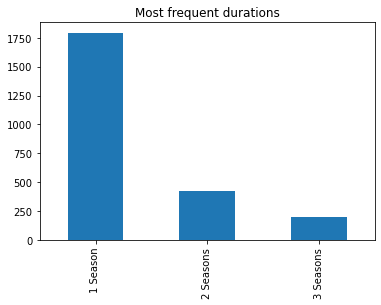

In [17]:
# Plotting the most frequent durations
net['duration'].value_counts().iloc[:3].plot.bar()
plt.title('Most frequent durations')
plt.show()

In [18]:
# Most directors unknown
net['director'].value_counts()

Unknown                   2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
                          ... 
Raz Degan                    1
James Woodroffe              1
Kelly Fremon Craig           1
Gustavo Ron                  1
Fisher Stevens               1
Name: director, Length: 4529, dtype: int64